<a href="https://colab.research.google.com/github/michkowalczuk/dw_matrix_road_signs/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Imports

In [31]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from skimage import color, exposure

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten,Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


##### Import data

In [32]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_3/dw_matrix_road_signs'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_3/dw_matrix_road_signs


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

[X_train, y_train] = train['features'], train['labels']
[X_test, y_test] = test['features'], test['labels']

In [0]:
df=pd.read_csv('data/signnames.csv')
labels = df.to_dict()['b']

In [35]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
y_train.shape

(34799, 43)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [37]:
if y_test.ndim == 1: y_test = to_categorical(y_test)
y_test.shape

(4410, 43)

#####Trenowanie modelu

In [0]:
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
  logdir = os.path.join("logs", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),  # rozmiar paczki
      epochs=params_fit.get('epochs', 5),            # liczba iteracji
      verbose=params_fit.get('verbose', 1),          # stan
      validation_data=params_fit.get('validation_data', (X_train, y_train)),  # do krzywych uczenia się
      callbacks=[tensorboard_callback]               # do wizualizacji
  )
  return model

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)  

In [44]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 6.5334 - accuracy: 0.2340 - val_loss: 1.7257 - val_accuracy: 0.5430
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.3876 - accuracy: 0.5969 - val_loss: 0.6154 - val_accuracy: 0.8464
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.7842 - accuracy: 0.7664 - val_loss: 0.2883 - val_accuracy: 0.9304
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.5248 - accuracy: 0.8415 - val_loss: 0.1662 - val_accuracy: 0.9624
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3876 - accuracy: 0.8835 - val_loss: 0.1207 - val_accuracy: 0.9781


0.8861678004535147

In [45]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 5.9380 - accuracy: 0.3405 - val_loss: 0.8011 - val_accuracy: 0.7998
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.8882 - accuracy: 0.7398 - val_loss: 0.2766 - val_accuracy: 0.9282
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.5348 - accuracy: 0.8415 - val_loss: 0.1552 - val_accuracy: 0.9672
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3670 - accuracy: 0.8898 - val_loss: 0.0970 - val_accuracy: 0.9769
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2881 - accuracy: 0.9149 - val_loss: 0.0713 - val_accuracy: 0.9869


0.9147392290249433

In [46]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.2669 - accuracy: 0.4770 - val_loss: 0.4666 - val_accuracy: 0.8882
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.6518 - accuracy: 0.8070 - val_loss: 0.1486 - val_accuracy: 0.9655
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3539 - accuracy: 0.8932 - val_loss: 0.0738 - val_accuracy: 0.9840
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2329 - accuracy: 0.9319 - val_loss: 0.0481 - val_accuracy: 0.9908
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1752 - accuracy: 0.9481 - val_loss: 0.0354 - val_accuracy: 0.9926


0.9600907029478458

In [47]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 13ms/step - loss: 2.1923 - accuracy: 0.4041 - val_loss: 0.5939 - val_accuracy: 0.8532
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.6591 - accuracy: 0.8016 - val_loss: 0.1539 - val_accuracy: 0.9574
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3446 - accuracy: 0.8956 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2428 - accuracy: 0.9294 - val_loss: 0.0884 - val_accuracy: 0.9766
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1967 - accuracy: 0.9429 - val_loss: 0.0348 - val_accuracy: 0.9899


0.9650793650793651

In [48]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.7411 - accuracy: 0.2710 - val_loss: 1.0450 - val_accuracy: 0.6597
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.8848 - accuracy: 0.7130 - val_loss: 0.2213 - val_accuracy: 0.9307
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4215 - accuracy: 0.8651 - val_loss: 0.0971 - val_accuracy: 0.9715
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2736 - accuracy: 0.9161 - val_loss: 0.0614 - val_accuracy: 0.9810
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2127 - accuracy: 0.9366 - val_loss: 0.0400 - val_accuracy: 0.9895


0.9696145124716553

#####Zmiana na grayscale

In [51]:
X_train[0].shape

(32, 32, 3)

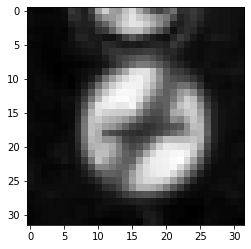

In [55]:
plt.imshow( color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [54]:
model=get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6811 - accuracy: 0.2400 - val_loss: 0.8670 - val_accuracy: 0.7318
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6009 - accuracy: 0.8079 - val_loss: 0.1393 - val_accuracy: 0.9631
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2481 - accuracy: 0.9229 - val_loss: 0.0604 - val_accuracy: 0.9828
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1588 - accuracy: 0.9509 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1163 - accuracy: 0.9643 - val_loss: 0.0253 - val_accuracy: 0.9925


0.9736961451247166